# SWI Challenge 2023 @ Groningen
## Dealing with netCDF files: a short tutorial to get started, using xarray

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# when running the script outside of jupyter/IPython:
from IPython.display import DisplayObject, display

### Define views and timeslots

In [3]:
views_DB = {
    "12_00_10": ["A5"],
    "12_01_10": ["A4"],
    "12_02_10": ["A3","B1"],
    "12_03_10": ["A2","B2"],
    "12_04_10": ["A1","B3"],
    "12_05_10": ["B4"],
    "12_06_10": ["B5"],
}

timeslots = list(views_DB.keys())
print(timeslots)
print()

print(f"There are {len(timeslots)} timeslots, and here is how they relate to the different views of Harmony A and B:")

for timeslot, views in views_DB.items():
    for view in views:
        print(timeslot, view)

['12_00_10', '12_01_10', '12_02_10', '12_03_10', '12_04_10', '12_05_10', '12_06_10']

There are 7 timeslots, and here is how they relate to the different views of Harmony A and B:
12_00_10 A5
12_01_10 A4
12_02_10 A3
12_02_10 B1
12_03_10 A2
12_03_10 B2
12_04_10 A1
12_04_10 B3
12_05_10 B4
12_06_10 B5


In [4]:
## use IPython magic to list all netCDF files in current working directory:
# !ls | grep .nc

## Open in xarray

#### Open file

In [5]:
# let us look at one of our netCDF files, as an example. Let's take the A3 one.

# sample_ds = xr.open_dataset("12_02_10_A3.nc", engine="netcdf4")
sample_ds = xr.load_dataset("12_02_10_A3.nc", engine="netcdf4")
# NB: - open_dataset opens lazily and turns the .nc file to read-only until the corresp. ds has been .closed().
#     - load_dataset loads all the .nc contents into memory closes the .nc file immediately after.

# info for that xr.Dataset:
display(sample_ds)

<xarray.Dataset>
Dimensions:            (iy: 630, ix: 1000)
Coordinates:
  * ix                 (ix) int64 999 998 997 996 995 994 993 ... 6 5 4 3 2 1 0
  * iy                 (iy) int64 0 1 2 3 4 5 6 ... 623 624 625 626 627 628 629
Data variables:
    cloud_edge_height  (iy, ix) float32 0.0675 0.0675 0.0675 ... nan nan nan
    latitude           (iy, ix) float64 13.57 13.57 13.57 ... 14.14 14.14 14.14
    longitude          (iy, ix) float64 301.3 301.3 301.3 ... 300.4 300.4 300.4
    theta_view         (iy, ix) float32 140.9 140.9 140.9 140.9 ... nan nan nan
    phi_view           (iy, ix) float32 92.21 92.21 92.19 92.19 ... nan nan nan
    y_DALES            (iy) float32 0.0 0.1 0.2 0.3 0.4 ... 62.6 62.7 62.8 62.9
    x_DALES            (ix) float32 99.95 99.85 99.75 99.65 ... 0.25 0.15 0.05
Attributes:
    scene:     DALES_highres PAN
    timeslot:  12_02_10
    view:      A3

`xr.Datasets` replicate the internal structure of a netCDF file.

They typically contain a collection of `xr.DataArrays`, and also store the corresponding metadata (e.g. `long_name`, `units`, `timeslot`, `view`).

#### Basics

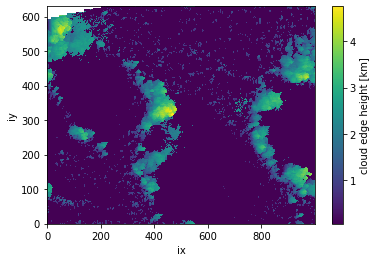

<xarray.DataArray 'cloud_edge_height' (iy: 630, ix: 1000)>
array([[0.0675    , 0.0675    , 0.0675    , ..., 0.0675    , 0.0675    ,
        0.0675    ],
       [0.0675    , 0.0675    , 0.0675    , ..., 0.0675    , 0.0675    ,
        0.0675    ],
       [0.0675    , 0.0675    , 0.0675    , ..., 0.0675    , 0.0675    ,
        0.0675    ],
       ...,
       [2.0024993 , 2.0024993 , 1.9124994 , ...,        nan,        nan,
               nan],
       [0.92250025, 1.0575002 , 1.0575002 , ...,        nan,        nan,
               nan],
       [0.92250025, 0.7875002 , 0.69750017, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * ix       (ix) int64 999 998 997 996 995 994 993 992 991 ... 7 6 5 4 3 2 1 0
  * iy       (iy) int64 0 1 2 3 4 5 6 7 8 ... 622 623 624 625 626 627 628 629
Attributes:
    long_name:   cloud edge height
    units:       km
    plot_title:  Cloud edge height [km]

In [6]:
# let's choose a sample layer among those
sample_layer = "cloud_edge_height"

# making a basic plot is easy:
sample_ds[sample_layer].plot()
plt.show()

# info for that xr.DataArray:
display(sample_ds[sample_layer])

In [7]:
# the metadata can be accessed and used. 

# example: print out the min and max values of that layer with units:
print(f"min {sample_layer}:", float(sample_ds[sample_layer].min()), sample_ds[sample_layer].attrs["units"])
print(f"max {sample_layer}:", float(sample_ds[sample_layer].max()), sample_ds[sample_layer].attrs["units"])

min cloud_edge_height: 0.06750000268220901 km
max cloud_edge_height: 4.747503757476807 km


##### `.where()`

Boolean indexing can be used in 1D; otherwise, one can use `.where()` to select data in 2D layers:

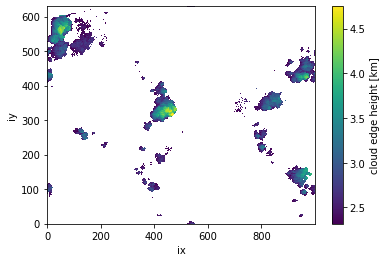

In [8]:
# e.g. plot the cloud_edge height, provided that it is larger than 2.3 km
sample_ds.cloud_edge_height.where(sample_ds.cloud_edge_height > 2.3).plot()
plt.show()

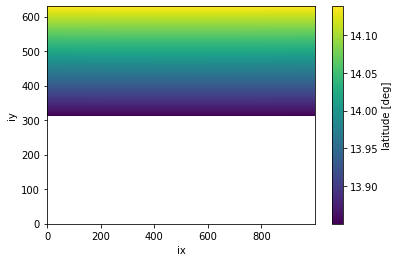

In [9]:
sample_ds.latitude.where(sample_ds.latitude > 13.85).plot()
plt.show()

##### numpy

You can use `.values` to turn `xr.DataArrays` into numpy arrays:

In [10]:
sample_ds.cloud_edge_height.values # numpy.ndarray

array([[0.0675    , 0.0675    , 0.0675    , ..., 0.0675    , 0.0675    ,
        0.0675    ],
       [0.0675    , 0.0675    , 0.0675    , ..., 0.0675    , 0.0675    ,
        0.0675    ],
       [0.0675    , 0.0675    , 0.0675    , ..., 0.0675    , 0.0675    ,
        0.0675    ],
       ...,
       [2.0024993 , 2.0024993 , 1.9124994 , ...,        nan,        nan,
               nan],
       [0.92250025, 1.0575002 , 1.0575002 , ...,        nan,        nan,
               nan],
       [0.92250025, 0.7875002 , 0.69750017, ...,        nan,        nan,
               nan]], dtype=float32)

In [11]:
sample_ds.cloud_edge_height.values.flatten() # 1D numpy.ndarray

array([0.0675, 0.0675, 0.0675, ...,    nan,    nan,    nan], dtype=float32)

## Simple plots, swap dims

### Simple example plots

In [12]:
plt.rc('font', size=12) # controls default text size for plots

In [13]:
for layer in sample_ds:
    print(layer)

cloud_edge_height
latitude
longitude
theta_view
phi_view
y_DALES
x_DALES


cloud_edge_height:


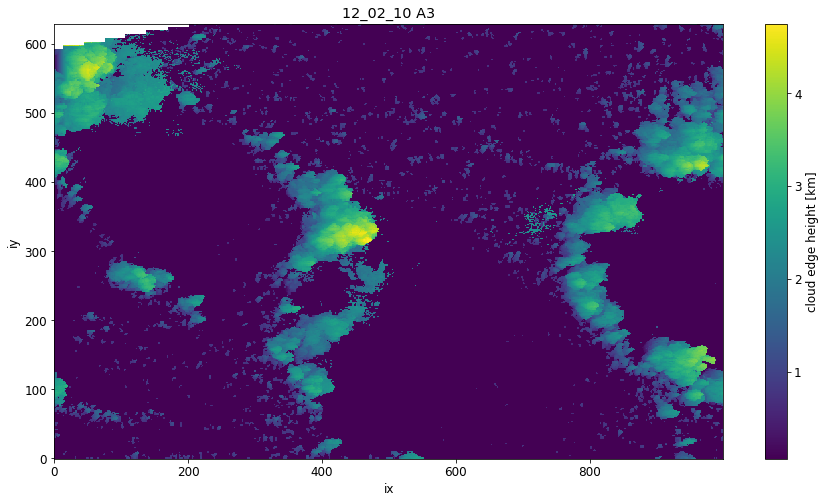

latitude:


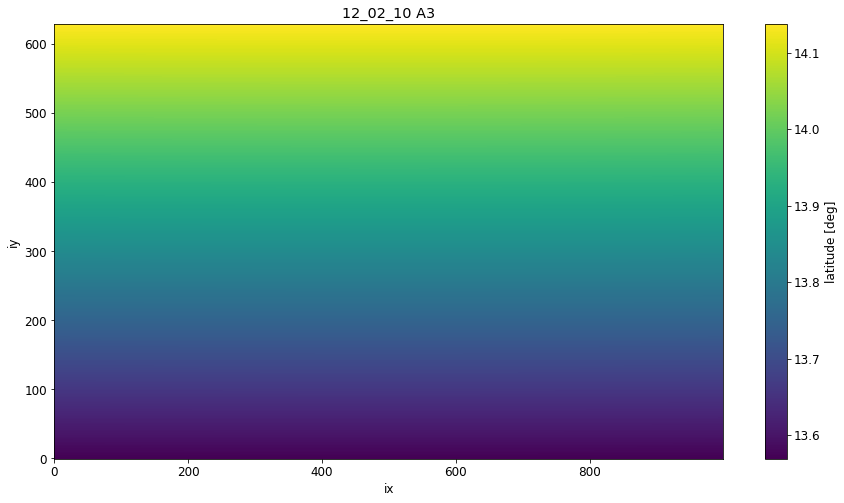

longitude:


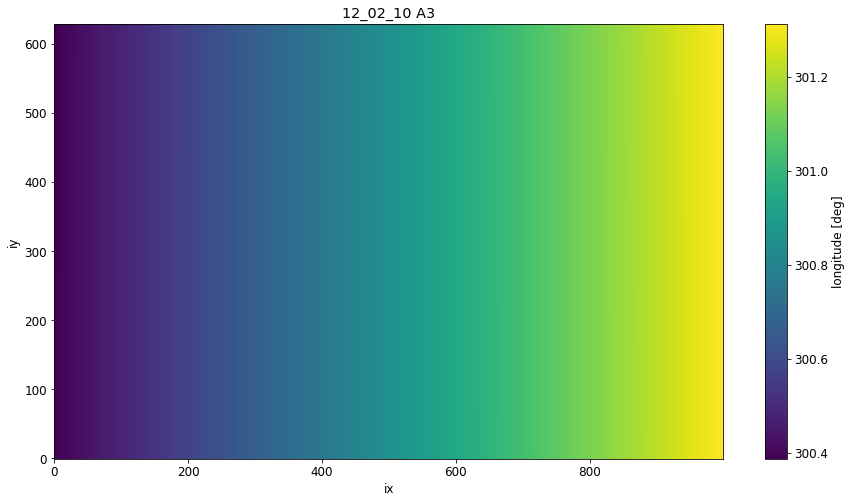

theta_view:


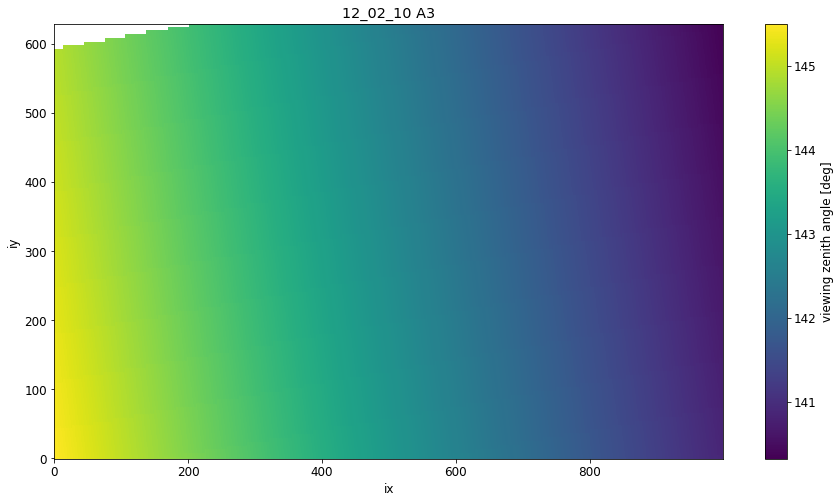

phi_view:


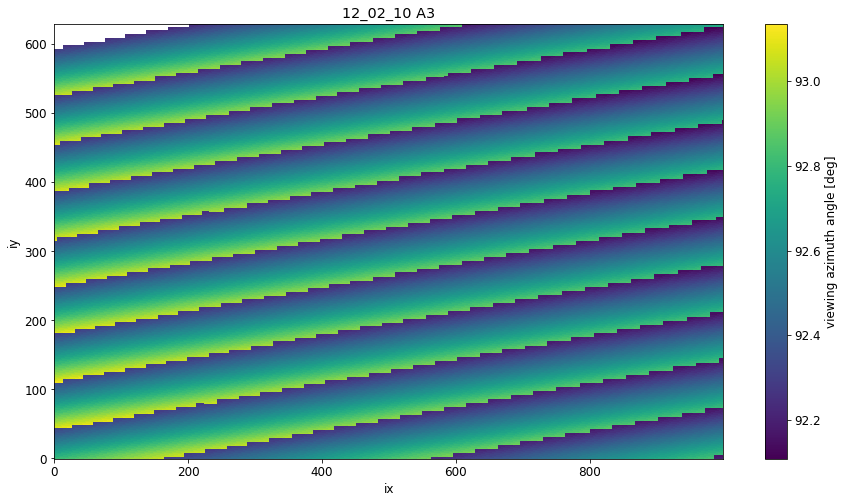

y_DALES:


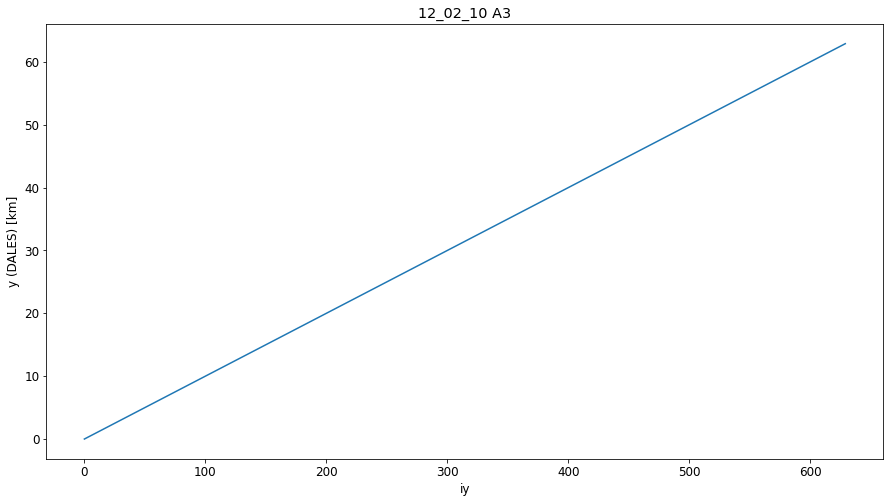

x_DALES:


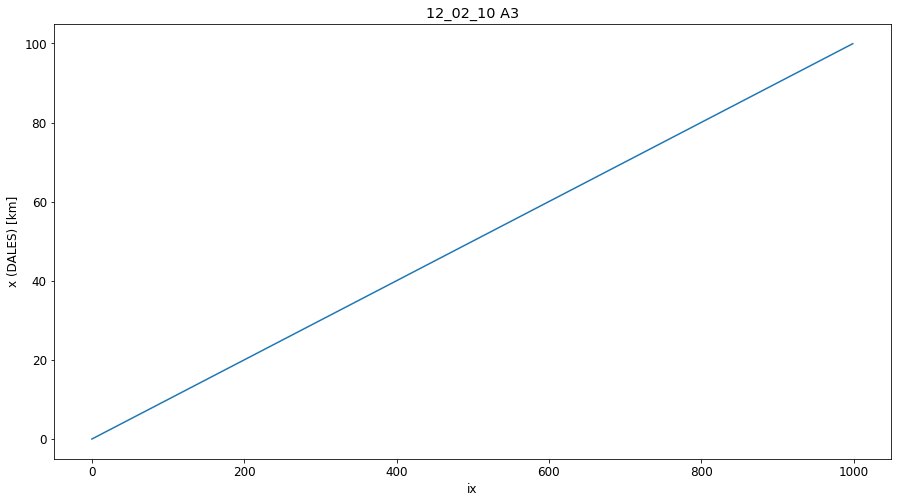

In [14]:
# let us loop and plot all the contents of our sample xr.Dataset:

timeslot = sample_ds.attrs["timeslot"]
view = sample_ds.attrs["view"]
title = f"{timeslot} {view}"

for layer in sample_ds:

    print(f"{layer}:")
    
    plt.figure(figsize=(15,8))
    sample_ds[layer].plot() # ix, iy
    plt.title(f"{title}")
    plt.show()

### Swap dims

cloud_edge_height:


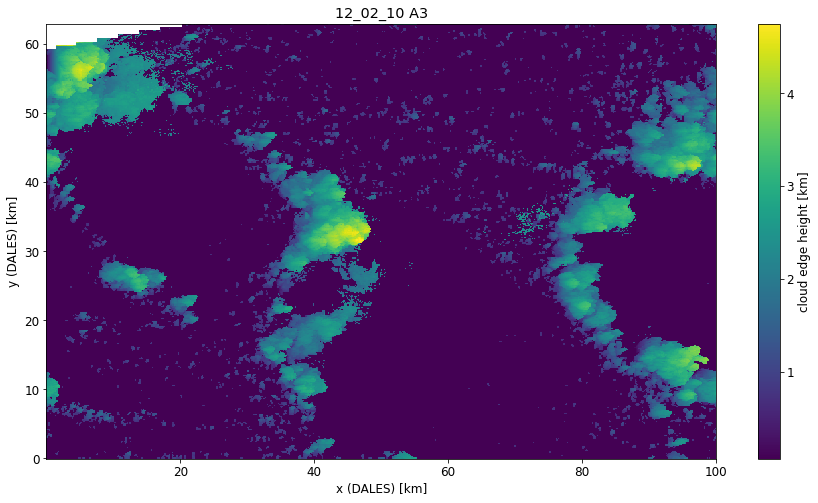

latitude:


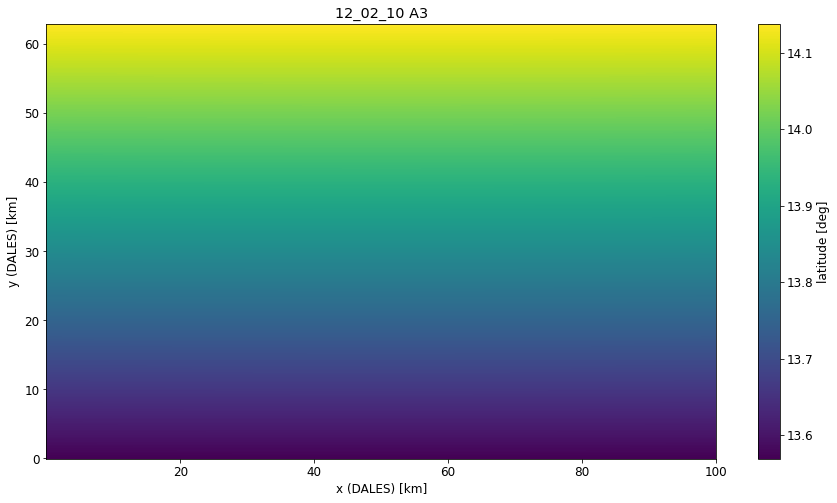

longitude:


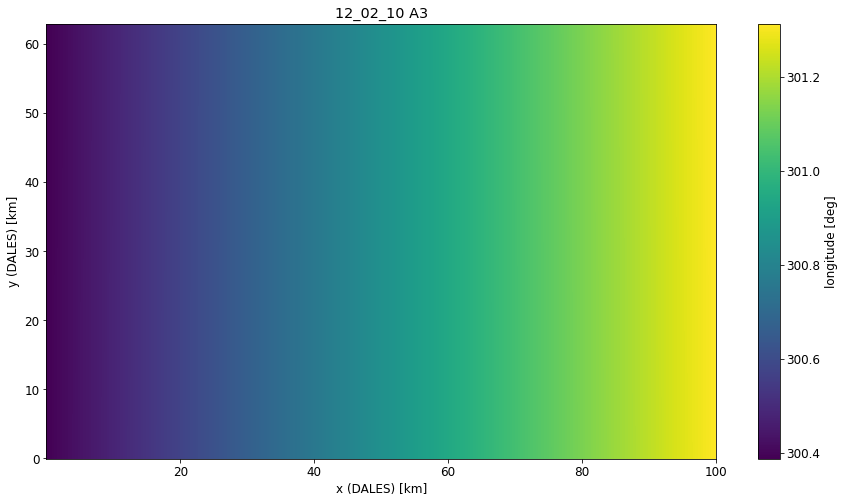

theta_view:


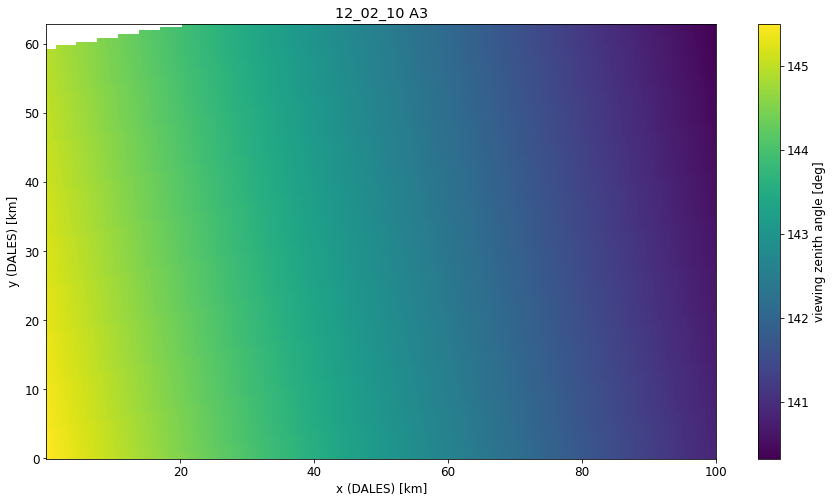

phi_view:


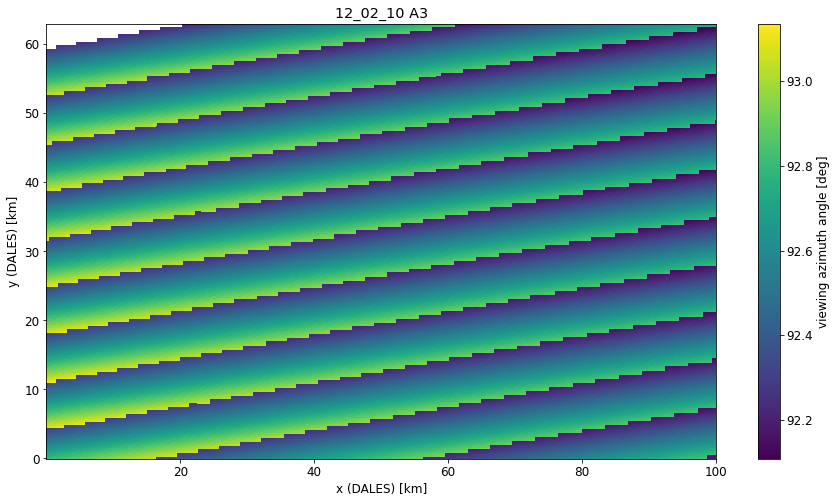

y_DALES:


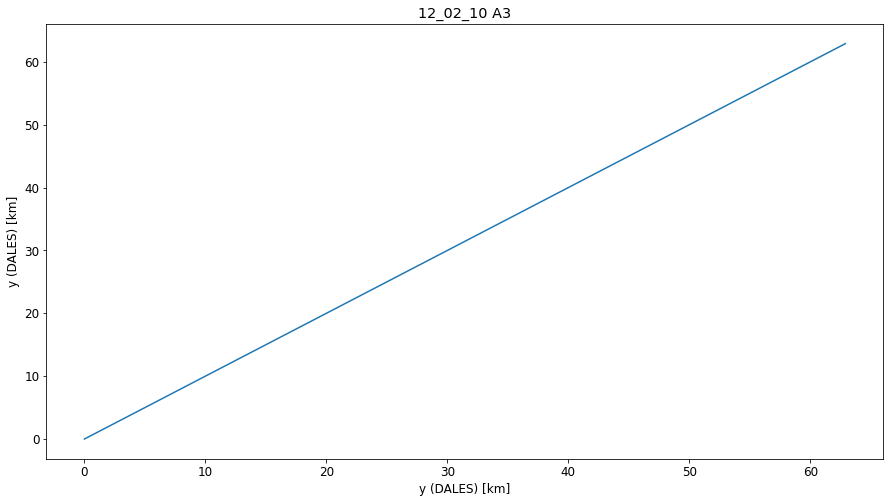

x_DALES:


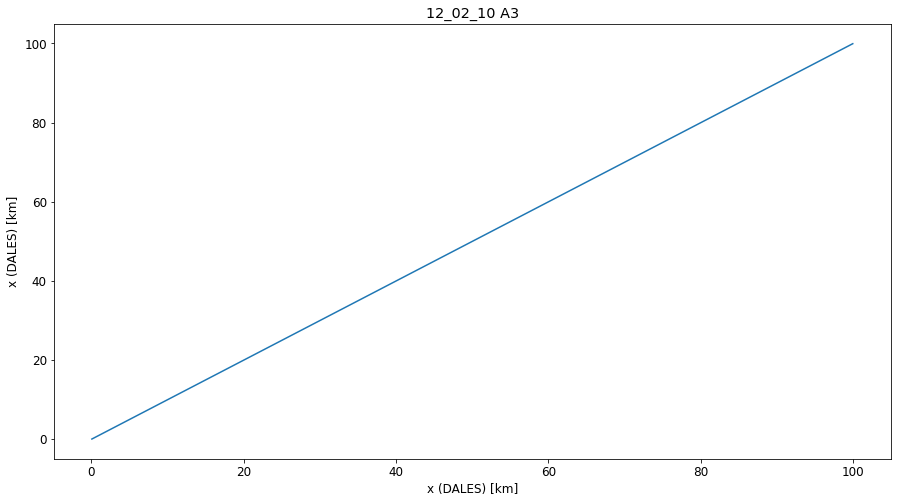

In [15]:
# Same as above, but we first swap the pixel indices for the corresponding distances in km:

for layer in sample_ds:

    print(f"{layer}:")
    
    plt.figure(figsize=(15,8))
    
    ## plot after swapping nx and ny (pixels) with along-track and cross-track (distance in km)
    sample_ds.swap_dims({
    "ix": "x_DALES",
    "iy": "y_DALES",
    })[layer].plot() # along track, cross track
    plt.title(f"{title}")
    plt.show()

## Plots: dealing with irregular latitude & longitude layers
Let's say you want to plot against latitude, longitude, which are here both in the form of 2D arrays (irregular grid).

### `plt.contourf`

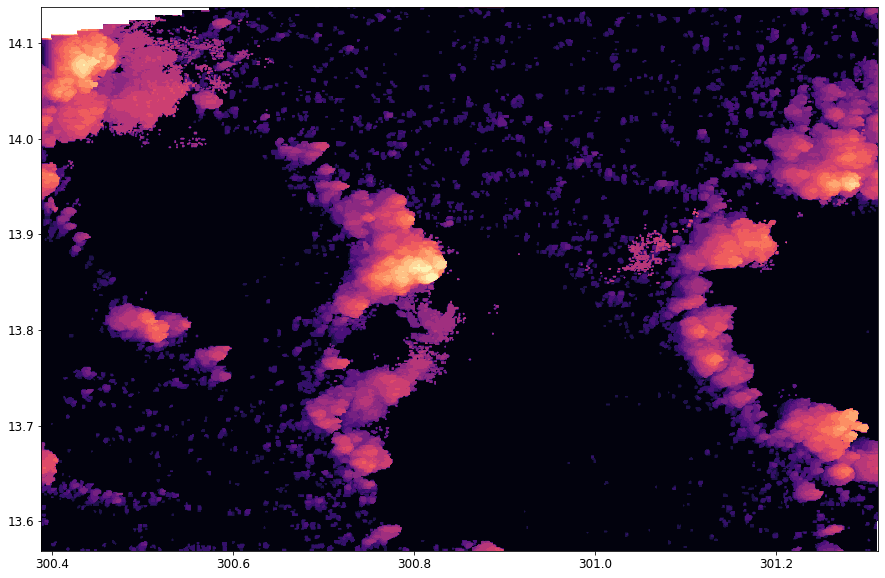

In [16]:
# contourf uses 2D arrays directly (works both with xr.DataArrays and with np.arrays):

if False: # replace by True to execute the reminder of the cell

    plt.figure(figsize=(15,10))

    plt.contourf(sample_ds.longitude, 
                 sample_ds.latitude, 
                 sample_ds.cloud_edge_height, 
                 levels=20,                    # < increase for a smoother palette
                 cmap="magma"
                )

#     plt.xlim((300., 302))
#     plt.ylim((13.5, 14.2))
    plt.show()

So, there's no need to even turn them to numpy arrays via `.values`.

### (Slower) Turn the 2D xr.DataArrays into 1D numpy arrays, then do a scatter plot

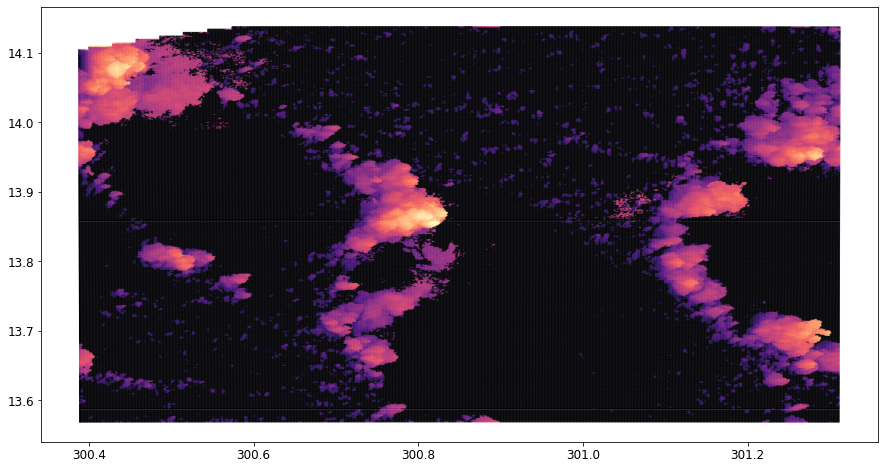

In [17]:
## xarray is not the best tool for everything.
## Switching to numpy at some point, e.g. before plotting, can be the sensible thing to do.

if False: # replace by True to execute the reminder of the cell

    lons = sample_ds.longitude.values.flatten()         # 1D numpy
    lats = sample_ds.latitude.values.flatten()          # 1D numpy
    cths = sample_ds.cloud_edge_height.values.flatten() # 1D numpy

    ## Then, you can e.g. simply do (nb: points plotted individually):
    plt.figure(figsize=(15,8))
    plt.scatter(lons, lats, c=cths, cmap='magma', s=0.1)
    ## Warning: do set s to a low value, otherwise visual glitches (large circles) appear due to the plotting process


    ## Don't do:
    # ## An example of the type of glitches you'd get with a large s (have a look at the left part of the image):
    # plt.scatter(lons, lats, c=cths, cmap='magma', s=200)

### Further (all kinds of techniques exist to deal with irregular data with matplotlib)
https://duckduckgo.com/?q=matplotlib+plot+irregular&t=ffab&ia=web gives a lot a good hits to address this general problem.

## Convert to pandas

#### Turn a `xr.Dataset` into a `pd.DataFrame`, via `to_dataframe()`

In [18]:
sample_df = sample_ds.to_dataframe()
sample_df

cloud_edge_height   latitude   longitude  theta_view   phi_view  \
iy  ix                                                                     
0   999             0.0675  13.568931  301.311066  140.875977  92.210716   
    998             0.0675  13.568933  301.310120  140.880310  92.211250   
    997             0.0675  13.568933  301.309204  140.884644  92.187485   
    996             0.0675  13.568935  301.308289  140.888962  92.187485   
    995             0.0675  13.568937  301.307343  140.893295  92.187485   
...                    ...        ...         ...         ...        ...   
629 4                  NaN  14.137438  300.390625         NaN        NaN   
    3                  NaN  14.137436  300.389679         NaN        NaN   
    2                  NaN  14.137435  300.388763         NaN        NaN   
    1                  NaN  14.137433  300.387848         NaN        NaN   
    0                  NaN  14.137433  300.387848         NaN        NaN   

           y_DALES    x_DALES  
iy  ix                         
0   999   0.000000  99.949997  
    998   0.000000  99.849998  
    997   0.000000  99.750000  
    996   0.000000  99.650002  
    995   0.000000  99.550003  
...            ...        ...  
629 4    62.899998   0.450005  
    3    62.899998   0.350006  
    2    62.899998   0.250000  
    1    62.899998   0.150002  
    0    62.899998   0.050003  

[630000 rows x 7 columns]

## Create a new `xr.Dataset`

<xarray.Dataset>
Dimensions:  (ix: 1000, iy: 630)
Coordinates:
  * ix       (ix) int64 999 998 997 996 995 994 993 992 991 ... 7 6 5 4 3 2 1 0
  * iy       (iy) int64 0 1 2 3 4 5 6 7 8 ... 622 623 624 625 626 627 628 629
Data variables:
    height   (iy, ix) float32 nan nan nan nan nan nan ... nan nan nan nan nan

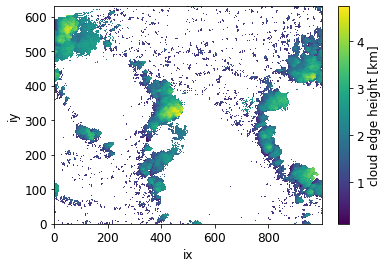

In [19]:
## create an empty xr.Dataset
ds_out = xr.Dataset()

# let's fill it in with something
ds_out["height"] = sample_ds["cloud_edge_height"].copy(deep=True) # deep copy prevents modifying the original data

# we could do some processing here on ds_out and be sure that wouldn't affect sample_ds
ds_out["height"] = ds_out["height"].where(ds_out["height"] > 0.0675)

# have a look
display(ds_out)
ds_out.height.plot()

## Getting the data out

In [20]:
## now, write the output .nc files

# enable compression when writing to netCDF: https://stackoverflow.com/a/40818232
comp = {"zlib": True, "complevel": 9} # < very small file (just takes a bit of time to write)
encoding = {var: comp for var in ds_out.data_vars}

# write to file
ds_out.to_netcdf("tutorial_outputs/out.nc", encoding=encoding)

### Export xarray data in csv format, via `to_dataframe()` and `to_csv()`

In [21]:
# export the entire xr.Dataset
if False: # replace by True to execute the reminder of the cell
    
    filename_out = f"tutorial_outputs/{sample_ds.timeslot}_{sample_ds.view}.csv"
    
    with open(filename_out, 'w') as file:
        file.write("#") # optional: comment out the header
        sample_ds.to_dataframe().to_csv(file, sep="\t", na_rep=np.nan)

In [22]:
# export a single xr.DataArray
if False: # replace by True to execute the reminder of the cell
    
    selected_array = "phi_view"
    filename_out = f"tutorial_outputs/{sample_ds.timeslot}_{sample_ds.view}_{selected_array}.csv"
    
    with open(filename_out, 'w') as file:
        file.write("#") # optional: comment out the header
        sample_ds[selected_array].to_dataframe().to_csv(file, sep="\t", na_rep=np.nan)

In [23]:
# export a selection of xr.DataArrays
if False: # replace by True to execute the reminder of the cell
    
    selected_arrays = ["cloud_edge_height", "longitude", "latitude",]
    filename_out = f"tutorial_outputs/{sample_ds.timeslot}_{sample_ds.view}_{'_'.join(selected_arrays)}.csv"
    
    with open(filename_out, 'w') as file:
        file.write("#") # optional: comment out the header
        sample_ds[selected_arrays].to_dataframe().to_csv(file, sep="\t", na_rep=np.nan)

### Realistic examples

In [24]:
if False:

    import glob

    # let's glob all .nc files corresponding to Harmony A
    for filename in sorted(glob.glob("*A*nc")):
        ds = xr.load_dataset(filename, engine="netcdf4")

        selected_arrays = ["cloud_edge_height", "longitude", "latitude",]
        filename_out = f"tutorial_outputs/{ds.timeslot}_{ds.view}_{'_'.join(selected_arrays)}.csv"

        with open(filename_out, 'w') as file:
            file.write("#") # optional: comment out the header
            ds[selected_arrays].to_dataframe().to_csv(file, sep="\t", na_rep=np.nan)

In [25]:
if False:

    selected_arrays = ["longitude", "latitude", "cloud_edge_height"]
    filename_out = f"tutorial_outputs/{sample_ds.timeslot}_{sample_ds.view}_{'_'.join(selected_arrays)}.csv"

    with open(filename_out, 'w') as file:
        file.write("#") # optional: comment out the header
        sample_ds[selected_arrays].to_dataframe().to_csv(file, sep="\t", na_rep=np.nan, index=False)

### (So (so) much slower) manual file dump

In [26]:
# Replace False by True in the following line if you want to execute the reminder of the cell (slow execution)
if False:

    with open('tutorial_outputs/data_out.dat', 'w') as file:
        for ix in sample_ds.ix:
            for iy in sample_ds.iy:
                
                file.write(
                      f"{float(sample_ds.longitude.isel(ix=ix, iy=iy)):.4f}\t" \
                    + f"{float(sample_ds.latitude.isel(ix=ix, iy=iy)):.4f}\t"  \
                    + f"{float(sample_ds.cloud_edge_height.isel(ix=ix, iy=iy)):.4f}\n"
                )

# Will be pretty slow to write to the output text file...

## Masking some edge
There are some glitchy pixels in the top left of the images, we can mask them.

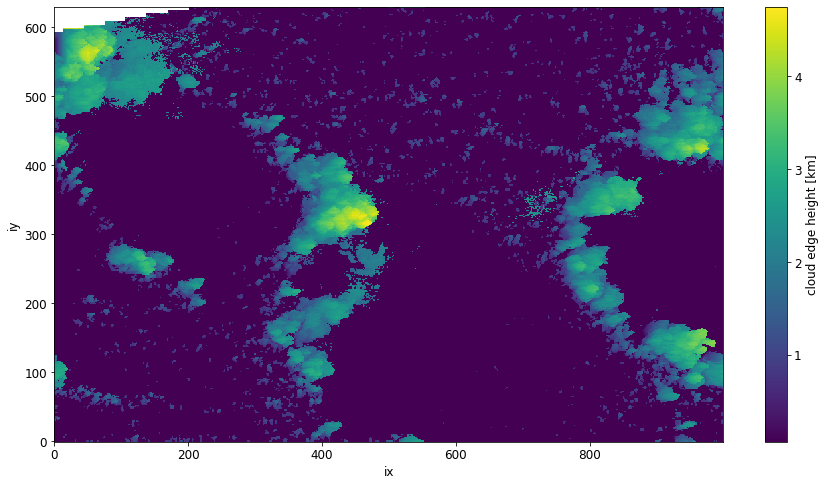

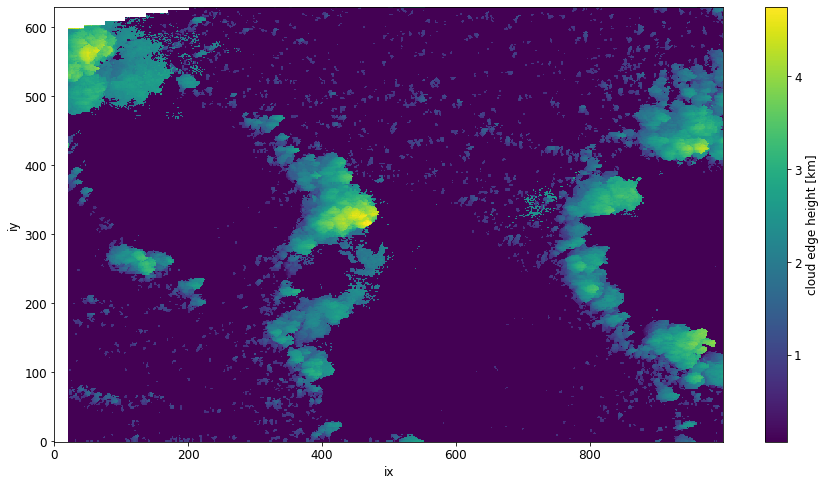

<xarray.Dataset>
Dimensions:            (ix: 1000, iy: 630)
Coordinates:
  * ix                 (ix) int64 999 998 997 996 995 994 993 ... 6 5 4 3 2 1 0
  * iy                 (iy) int64 0 1 2 3 4 5 6 ... 623 624 625 626 627 628 629
Data variables:
    cloud_edge_height  (iy, ix) float32 0.0675 0.0675 0.0675 ... nan nan nan
    latitude           (iy, ix) float64 13.57 13.57 13.57 ... 14.14 14.14 14.14
    longitude          (iy, ix) float64 301.3 301.3 301.3 ... 300.4 300.4 300.4
    theta_view         (iy, ix) float32 140.9 140.9 140.9 140.9 ... nan nan nan
    phi_view           (iy, ix) float32 92.21 92.21 92.19 92.19 ... nan nan nan
    y_DALES            (iy) float32 0.0 0.1 0.2 0.3 0.4 ... 62.6 62.7 62.8 62.9
    x_DALES            (ix) float32 99.95 99.85 99.75 99.65 ... 0.25 0.15 0.05
Attributes:
    scene:     DALES_highres PAN
    timeslot:  12_02_10
    view:      A3

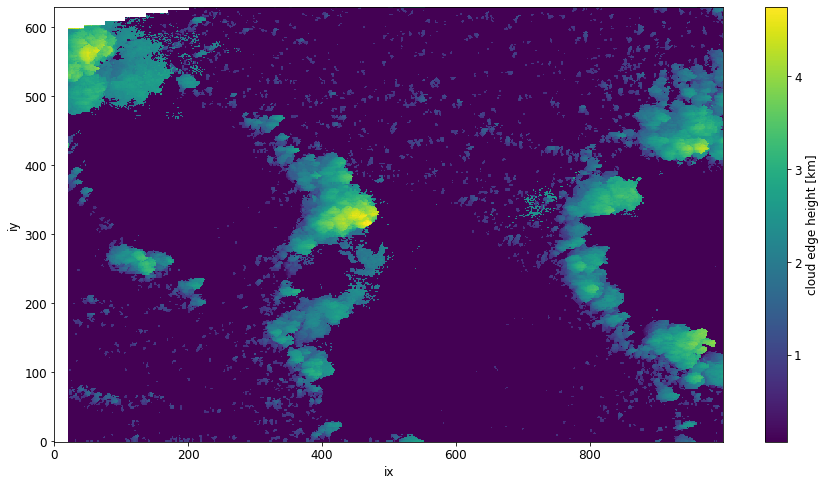

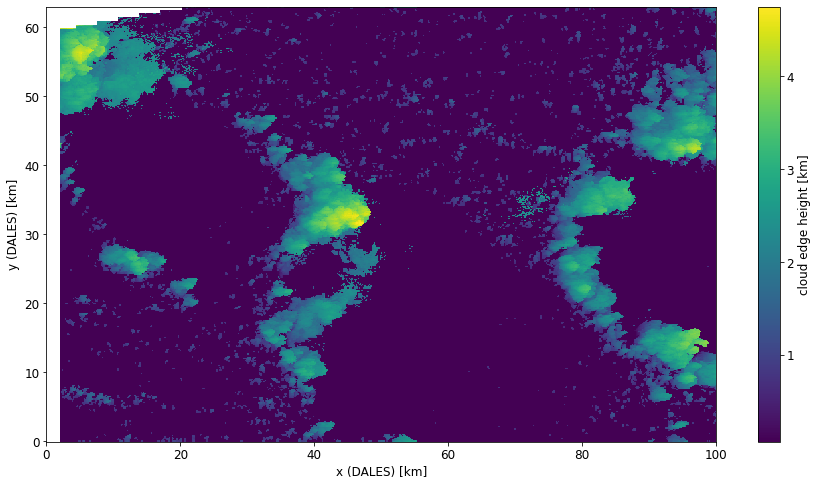

In [27]:
## show original fig
# display(sample_ds)
plt.figure(figsize=(15,8))
sample_ds.cloud_edge_height.plot()
plt.show()
# plt.figure(figsize=(15,8))
# sample_ds.swap_dims({
#     "ix": "x_DALES",
#     "iy": "y_DALES",
# }).cloud_edge_height.plot()
# plt.show()

## show only ix pixels larger than some chosen threshold (beware, everything is still there if we stop using .where())
plt.figure(figsize=(15,8))
sample_ds.cloud_edge_height.where(sample_ds.ix >20).plot()
plt.show()

## mask for good
masked_ds = sample_ds.copy(deep=True)
masked_ds["cloud_edge_height"] = masked_ds.cloud_edge_height.where(sample_ds.ix > 20, drop=True)
display(masked_ds)

plt.figure(figsize=(15,8))
masked_ds.cloud_edge_height.plot()
plt.show()

plt.figure(figsize=(15,8))
masked_ds.swap_dims({
    "ix": "x_DALES",
    "iy": "y_DALES",
}).cloud_edge_height.plot() # NB: do swap dims before specifying the layer (otherwise, you might get weird results or a swapped fig)
plt.xlim(0,100)
plt.show()


## Regridding example

### When a regular grid is needed (should not be the case here, really)
    Matplotlib: gridding irregularly spaced data
    --------------------------------------------
    A commonly asked question on the matplotlib mailing lists is "how do I make a contour plot of my irregularly spaced data?". 
    The answer is, first you interpolate it to a regular grid.

source: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Gridding_irregularly_spaced_data.html

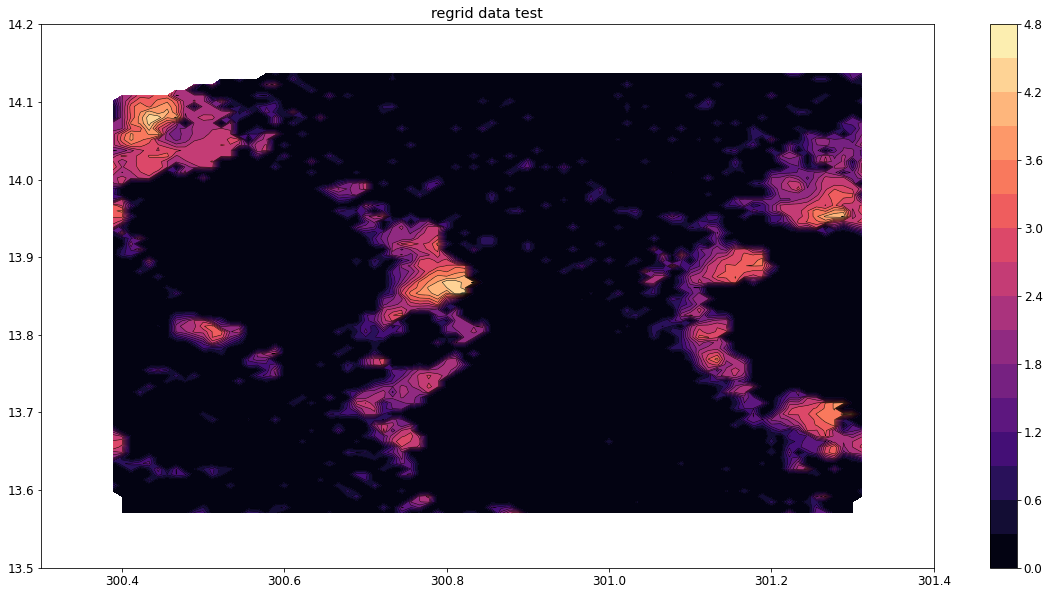

In [28]:
if False: # replace by True to execute the reminder of the cell

    # Adapting ^ to the use of our own irregularly spaced data

    import numpy as np
    from scipy.interpolate import griddata
    import matplotlib.pyplot as plt

    plt.figure(figsize=(20,10))

    x = lons
    y = lats
    z = cths

    # define grid.
    xi = np.linspace(300.3,301.4,100)
    yi = np.linspace(13.5,14.2,100)

    # grid the data.
    # zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic') ## beware that it can lead to *unphysical* values
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
    # zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='nearest') ## beware that it extrapolates for some reason

    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap="magma")
    plt.colorbar() # draw colorbar

    plt.xlim(300.3, 301.4)
    plt.ylim(13.5,14.2)
    plt.title('regrid data test')
    plt.show()

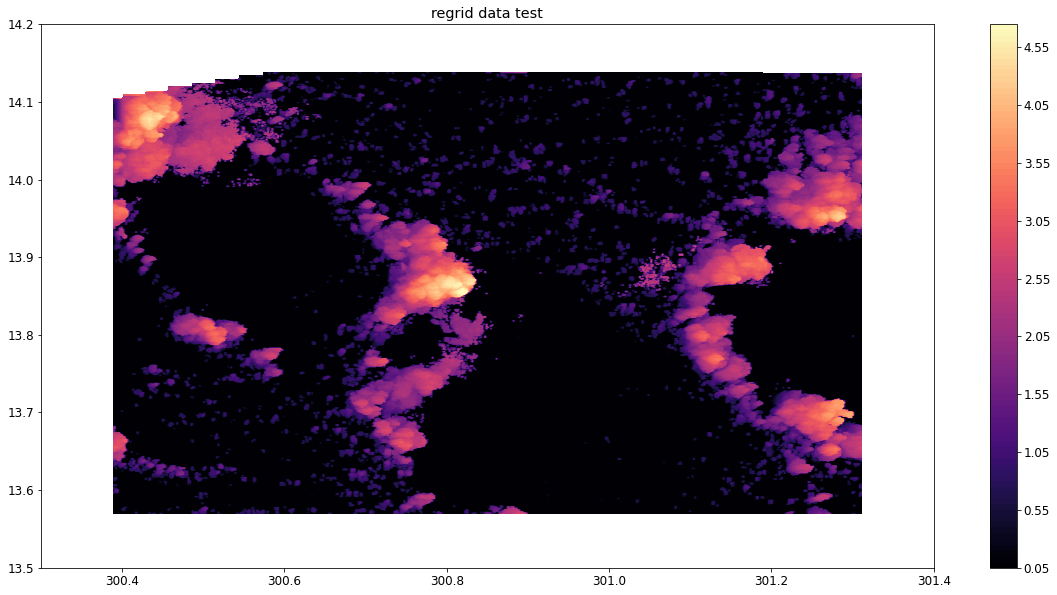

In [29]:
if False: # replace by True to execute the reminder of the cell

    # Adapting ^ to the use of our own irregularly spaced data
    
    import numpy as np
    from scipy.interpolate import griddata
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,10))
    x = lons
    y = lats
    z = cths
    # define grid.
    xi = np.linspace(300.3,301.4,630) ## < here, I've increased to 630 (but one could put 1000 also of course)
    yi = np.linspace(13.5,14.2,1000)   ## < ______________________ 1000
    # grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    # CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,100,cmap="magma")
    plt.colorbar() # draw colorbar

    ### we won't show the points because there are so many, we'd just see a big blue overlay
    # # plot data points.
    # plt.scatter(x,y,marker='o',c='b',s=5)


    plt.xlim(300.3, 301.4)
    plt.ylim(13.5,14.2)
    plt.title('regrid data test')
    plt.show()